#Predict Customer Personality to Boost Marketing Campaign

**Table of Content:**

- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model

## **Tugas 1 Conversion rate analysis based on income, spending and age**


**Load Dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Portofolio/Predict Customer Clicked Ads Classification by Using Machine Learning/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
pd.pandas.set_option("display.max_columns",None)
df.head(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
5,emptyMacaw4,106419,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,Indeed,3,4.0,6.0,0.0,10.0,+6283886053xxx,emptyMacaw4468@yahoo.com,Sarjana,1,0.0,masih_bekerja,1980-05-12,2016-10-02,2020-02-06,-
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,2,3.0,4.0,0.0,19.0,+6285735701xxx,madZebra1244@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,-
7,cynicalMandrill7,110500,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Kurang,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,+6281293511xxx,cynicalMandrill7920@hotmail.com,Magister,1,NaN,masih_bekerja,1983-08-24,2013-07-08,2020-1-14,-
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,3,NaN,0.0,0.0,5.0,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
9,enviousMoth4,110927,Menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,4,5.0,6.0,0.0,4.0,+6281391211xxx,enviousMoth4516@yahoo.com,Sarjana,1,NaN,masih_bekerja,1984-02-21,2015-3-30,2020-01-03,-


In [5]:
df.shape

(287, 25)

In [6]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Username,object,0,0.00,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [7]:
df.duplicated().sum()

0

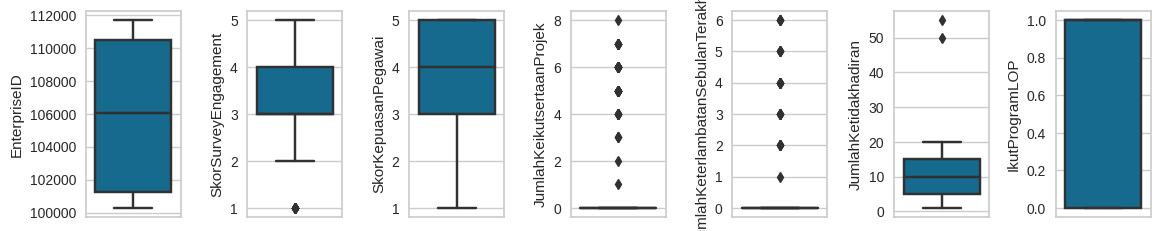

In [8]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

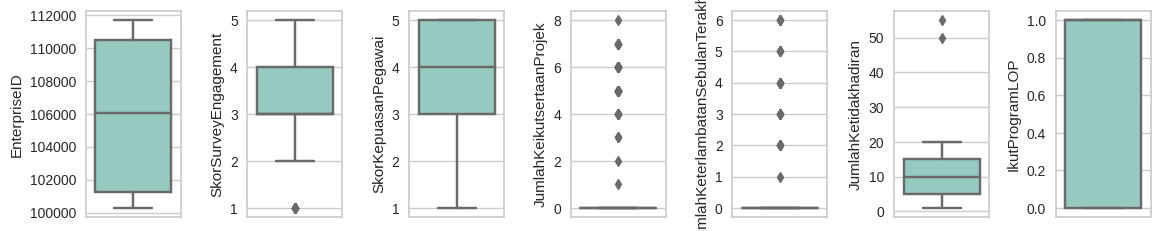

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

color_palette = 'Set3'

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], palette=color_palette, orient='v')
    plt.tight_layout()

plt.show()


**Kesimpulan:**
- Dataset terdiri dari 30 fitur dan 2240 baris
- Terdapat Missing value pada fitur Income
- Tidak ada data yang duplikat
- Secara keseluruhan data cenderung memiliki outlier
- Terlihat nilai ekstrim pada fitur Income dan Year_Birth

**Data Cleaning**

In [10]:
df1 = df.copy()


In [11]:
df1.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 287


KeyError: ignored

In [ ]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()

color_palette = 'Set3'

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v', palette=color_palette)
    plt.tight_layout()

plt.show()


In [ ]:
df1.fillna(df1['Income'].median(), inplace=True)

In [ ]:
df1.isna().sum().sum()

**Feature Engineering**

In [ ]:
# konversi ke datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# kolom baru durasi membership
df1['Membership_Duration'] = 2023 - df1['Dt_Customer'].dt.year

# kolom usia
df1['Age'] = 2023 - df1['Year_Birth']

In [ ]:
df1['Membership_Duration'].value_counts()

In [ ]:
print(f'min age: {df1.Age.min()}')
print(f'max age: {df1.Age.max()}')

In [ ]:
df1['Age_Categories'] = np.where(df1['Age'] < 40, 'Young ',
                        np.where(df1['Age'] < 60, 'Middle-Aged',
                                'Old'))

In [ ]:
df1['Age_Categories'].value_counts()

In [ ]:
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']
df1['Total_Children'].value_counts()

In [ ]:
df1['Total_Transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases']


df1['Total_Transaction'].value_counts()

In [ ]:
df1['Total_Spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

df1['Total_Spending'].value_counts()

In [ ]:
df1['Total_Accepted_Campaign'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

df1['Total_Accepted_Campaign'].value_counts()

In [ ]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1['CVR'] = round(df1.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

df1['CVR'].value_counts()

**Exploratory Data Analysis**

In [ ]:
df2 = df1.copy()

In [ ]:
nums = df2.loc[:, (df2.dtypes == 'int64') | (df2.dtypes == float)].columns.tolist()
nums = nums[3:]
print(nums)
print(len(nums))

In [ ]:
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

In [ ]:
n_feats = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']


In [ ]:
df2[n_feats].describe().round(2).T

**Kesimpulan:**
- Mayoritas pelanggan memiliki income kurang lebih sebesar Rp47.000.000/tahun
- Mayoritas jarak pelanggan akan berbelanja lagi sekitar 1,5 bulan setelah pembelanjaan terakhir
- Mayoritas pelanggan telah menjadi member selama 10 tahun
- Mayoritas pelanggan hanya memiliki satu anak
- Mayoritas pelanggan melakukan 15 transaksi
- Mayoritas pelanggan berbelanja mengeluarkan biaya sekitar Rp.440.000
- Mayoritas pelanggan tidak menerima campaign

In [ ]:
df2[cats].describe().T

**Kesimpulan:**

Mayoritas pelanggan berasal dari latar pendidikan S1, telah menikah, dan dengan kategori umur Middle-Aged

In [ ]:
plt.figure(figsize=(15, 8))
for i in range(0, len(n_feats)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df2[n_feats[i]])
    plt.tight_layout()


**Kesimpulan:**
- Distribusi fitur Income, Age, dan Recensy cenderung mendekati distribusi normal
- Distribusi Total_Transaction, Total_Spending dan CVR mederung positively skewed

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=df2[cats[i]], color='steelblue')

    for a in ax.patches:
        txt = np.round(a.get_height())
        anot = txt.astype('int64')
        ax.annotate(anot, (a.get_x()+a.get_width()/2, a.get_height()),
                    ha='center', va='top', xytext=(0, 9), textcoords='offset points')
    plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
    plt.tight_layout()


**Bivariate Analysis**

Conversion Rate vs Income, Spending, and Age

In [ ]:
variable = ['Income', 'Total_Spending', 'Age']

In [ ]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df2[variable[var]], y='CVR', data=df2, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

**Kesimpulan:**
- Secara kesluruhan pendapatan dan total spending memiliki korelasi posistif terhadap konversi pembelian. Sehingga semakin tinggi pendapatan dan total spending, kemungkinan konversi atau pembelian dari calon konsumen juga meningkat.
- Korelasi positif disebabkan oleh beberapa faktor, meliputi kemampuan finansial yang lebih baik untuk memenuhi kebutuhan atau keinginan pelanggan, serta persepsi nilai yang tinggi terhadap produk atau layanan yang ditawarkan.
- Fitur usia cenderung tidak memiliki korelasi yang signifikan terhadap conversion rate. Ini berarti usia tidak menjadi faktor dominan yang mempengaruhi keputusan konsumen untuk melakukan konversi atau pembelian.

In [ ]:
variable = ['Income', 'Total_Spending']

In [ ]:
plt.figure(figsize=(10, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 2, var+1)
    sns.regplot(x=df2[variable[var]], y='Age', data=df2, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Age')
    plt.tight_layout()

**Kesimpulan:**
- Usia memiliki korelasi positif yang lemah bahkan tidak memiliki korelasi yang signifikan terhadap fitur pendapatan (Income) atau total pengeluaran (total spending).
- Usia tidak secara langsung mempengaruhi tingkat pendapatan atau pola pengeluaran seseorang. Meskipun demikian, perusahaan masih perlu mempertimbangkan faktor usia sebagai bagian dari strategi pemasaran mereka.
- Korelasi yang lemah menunjukkan bahwa usia mungkin bukan faktor penentu utama dalam keputusan konsumen.

In [ ]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Total_Spending', y='Income', data=df2, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'red'}).set(title=f'Regression plot of Total Spending and Income')

**Kesimpulan:**

- Income dan total spending memiliki korelasi positif yang kuat.
- Hubungan yang signifikan antara tingkat pendapatan seseorang dengan pola pengeluaran mereka. Semakin tinggi pendapatan seseorang, kemungkinan besar mereka juga memiliki pengeluaran yang lebih tinggi.

In [ ]:
sns.pairplot(df2[['Income', 'Total_Spending', 'Age_Categories', 'CVR']], hue = 'Age_Categories', palette=['orange', 'steelblue','silver'])


**Kesimpulan:**
- Pada pairplot fitur Income, Total_Spending, dan CVR terlihat bahwa tidak ada kelompok usia yang jelas atau pola yang terlihat.
- Distribusi usia terlihat lebih merata atau tidak terkelompok secara signifikan. Hal ini menunjukkan bahwa usia mungkin tidak menjadi faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi (CVR). Namun faktor-faktor lain seperti pendapatan dan pola pengeluaran mungkin memiliki pengaruh yang lebih besar.

In [ ]:
df_prep = df2.copy()

In [ ]:
mapping_education = {'SMA' : 0,
                     'D3' : 1,
                     'S1' : 2,
                     'S2' : 3,
                     'S3' : 4}

df_prep['education_encd'] = df_prep['Education'].map(mapping_education)

In [ ]:
df_s = df_prep.copy()

In [ ]:
X = df_s.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Categories', 'Dt_Customer'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
df_model = X.copy()

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2)
pca.fit(df_model)


data_pca = pca.transform(df_model)

In [ ]:
data_pca1 = pd.DataFrame(data_pca)

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(data_pca1)
    inertia.append(kmeans.inertia_)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))


plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(data_pca1)
visualizer.show()

**Kesimpulan:**

Berdasarkan Distortion Score dan Elbow methode didapatkan jumlah cluster terbaik adalah 4

In [ ]:

from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [ ]:
data_pca1.sample(5)

In [ ]:
color = "Set1"

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette=color)
plt.title('Cluster Segmentation')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

In [ ]:
data_pca1.columns = data_pca1.columns.astype(str)
visualize_silhouette_layer(data_pca1)

**Kesimpulan:**
- Berdasarkan Silhouette Score, jumlah cluster terbaik yang direkomendasikan adalah 4.
- Nilai Silhouette Score pada jumlah cluster tersebut lebih tinggi dibandingkan dengan jumlah cluster lainnya, menandakan kualitas clustering yang lebih baik.

##**Customer Personality Analysis for Marketing Retargeting**

In [ ]:
df_prep['Cluster'] = kmeans.labels_

In [ ]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income', 'CVR','Cluster', 'Age']
data_summary = df_prep[feats]

In [ ]:
round(data_summary.groupby('Cluster').agg(['median']),2).round()

In [ ]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    color_palette = "Set1"
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df_prep[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df_prep.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=sns.color_palette(color_palette, len(x)))
        plt.title(col)
        i = i + 1

dist_list(['Total_Transaction','Total_Spending', 'Income', 'Recency', 'CVR', 'Age'])
plt.tight_layout()
plt.show()

Berdasarkan hasil clustering dapat diketahui karakteristik dari setiap segment cluster

Cluster 0
- Angka transaksi dan spending tertinggi yaitu mayoritas 25 transaksi dan Rp.1.116.000 perbulan
- Pendapatan cukup tinggi, mayoritas Rp.65.215.000/tahun
- Conversion rate sedang, yaitu 4%
- Mayoritas usia 60 tahun

Cluster 1
- Angka transaksi dan spending terendah yaitu mayoritas hanya 7 transaksi dan Rp.58.000 perbulan
- Pendapatan terendah, mayoritas Rp.33.297.500/tahun
- Conversion terendah, yaitu 1%
- Mayoritas usia 50 tahun

Cluster 2
- Angka transaksi dan spending cukup tinggi yaitu mayoritas 20 transaksi dan Rp.1.040.000 perbulan
- Pendapatan tertinggi, mayoritas Rp.71.488.000/tahun
- Conversion rate tertinggi, yaitu 8%
- Mayoritas usia 54 tahun

Cluster 3
- Angka transaksi dan spending sedang yaitu mayoritas 17 transaksi dan Rp.434.000 perbulan
- Pendapatan cukup sedang, mayoritas Rp.52.597.000/tahun
- Conversion rate cukup sedang, yaitu 3%
- Mayoritas usia 58 tahun
- Dari karakteriktik tersebut, dapat setiap cluster dapat dikelompok berdasarkan kategori, yaitu:

Cluster 0: "High-Transaction High-Spending Group" - High Customer A

Cluster 1: "Low-Transaction Low-Spending Group" - Low Customer

Cluster 2: "High-Income High-Conversion Group" - High Customer B

Cluster 3: "Moderate-Transaction Moderate-Spending Group" - Moderate Customer

In [ ]:
cluster_count = data_summary['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

In [ ]:
color_palette = "Set1"

fig, ax = plt.subplots(figsize=(10,6))

bars = plt.bar(x=cluster_count['Cluster'], height=cluster_count['percentage (%)'], color=sns.color_palette(color_palette))

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height} %', ha='center', va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(range(0, 4))

plt.show()

**Kesimpulan:**
- 50% dari populasi termasuk dalam kelompok Low Customer. Meskipun kelompok ini memiliki angka transaksi dan pengeluaran yang rendah, namun karena populasi mereka yang besar, perusahaan dapat fokus untuk menarik perhatian mereka.
- Populasi High Customer A dan B cenderung rendah, namun memiliki potensi transaksi, spending, konversi, dan income yang tinggi. Perusahaan dapat mempertimbangkan strategi pemasaran yang lebih personal dan eksklusif untuk menarik minat mereka.

In [ ]:
variable = [ 'Recency', 'Total_Transaction', 'Total_Spending', 'Income', 'NumWebVisitsMonth', 'Total_Accepted_Campaign', 'CVR', 'Membership_Duration',
            'Age', 'education_encd']

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=df_prep[variable[i]], data=df_prep, palette=color).set(title=f'Customer\'s {variable[i]} Distribution by Cluster')
    plt.tight_layout()

**Kesimpulan:**
- Kategori Low Customer atau Cluster 1 yang memiliki distribusi jumlah kunjungan website yang tinggi, namun memiliki total acceptance campaign yang rendah.
- Cluster yang paling banyak merespon campaign adalah High Customer A atau Cluster 0 dengan tingkat konversi yang sedang.
- High Spender B atau Cluster 2 menarik perhatian karena mayoritas pelanggannya tidak terlalu sering mengunjungi website perusahaan, namun memiliki distribusi konversi rate yang lebih tinggi dengan respon campaign yang tidak terlalu tinggi

In [ ]:
sns.lmplot(y='Income', x='Total_Spending', hue='Cluster', fit_reg=False, data=df_prep, palette=color, scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

**Kesimpulan:**

Berdasarkan plot korelasi antara pendapatan (Income) dan total pengeluaran (Total Spending), terlihat bahwa terbentuknya cluster atau kelompok yang dapat dibedakan. Terlihat bahwa High cluster 0 dan 3 cenderung berada dalam satu kelompok, yaitu dalam kategori high customer. Hal ini menunjukkan adanya hubungan positif antara tingkat pendapatan dan pengeluaran pelanggan dalam kelompok tersebut. Dengan mengetahui pola korelasi ini, perusahaan dapat mengoptimalkan strategi pemasaran dan penawaran produk mereka.